In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
df = pd.read_csv("customer_retention.csv", encoding="latin1")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)


In [15]:
df["Returned"] = df["Churn"].map({"Yes": 0, "No": 1})


In [16]:
median_charge = df["MonthlyCharges"].median()

df["Discount_Received"] = (df["MonthlyCharges"] < median_charge).astype(int)


In [17]:
discount_group = df[df["Discount_Received"] == 1]["Returned"]
no_discount_group = df[df["Discount_Received"] == 0]["Returned"]


In [18]:
t_stat, p_value = ttest_ind(discount_group, no_discount_group)
t_stat, p_value


(np.float64(16.614477431808055), np.float64(7.827801727046233e-61))

In [20]:
return_rates = (
    df.groupby("Discount_Received")["Returned"]
    .mean()
    .reset_index()
)

return_rates


,Discount_Received,Returned
0,0,0.648495
1,1,0.820228


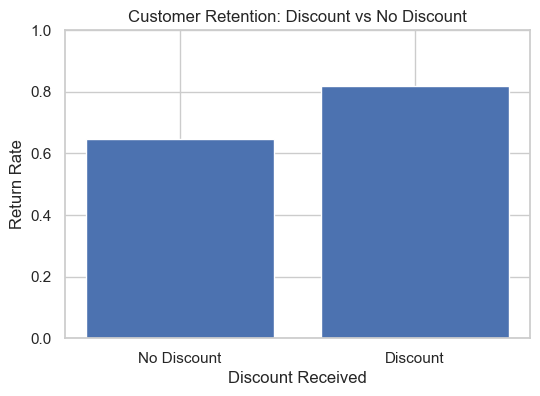

In [21]:
plt.figure(figsize=(6,4))
plt.bar(
    return_rates["Discount_Received"],
    return_rates["Returned"]
)

plt.xticks([0, 1], ["No Discount", "Discount"])
plt.xlabel("Discount Received")
plt.ylabel("Return Rate")
plt.title("Customer Retention: Discount vs No Discount")
plt.ylim(0, 1)
plt.show()
